In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.iloc[-1000:]

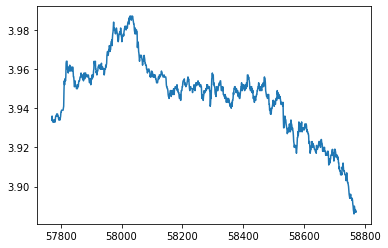

In [4]:
plt.plot(df['open'])
plt.show()

In [5]:
span_pred = 10

### 波动性预测模型测试

In [6]:
import arch

In [7]:
vol_pred_ewma = df['open'].ewm(span=span_pred, adjust=False).std()

使用Garch时为了有更好的fit结果需要scale一下。

In [8]:
vol_pred_garch = (1000 * df['open']).rolling(window=span_pred).apply(lambda x: arch.arch_model(x).fit(disp='off').forecast(horizon=1).variance.iloc[-1, 0] ** 0.5) / 1000

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After Septembe

In [9]:
vol_pred = df['open'].iloc[::-1].rolling(span_pred).std().iloc[::-1]

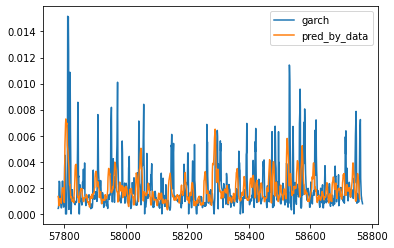

In [10]:
plt.plot(vol_pred_garch[span_pred:], label='garch')
plt.plot(vol_pred[span_pred:], label='pred_by_data')
plt.legend()
plt.show()

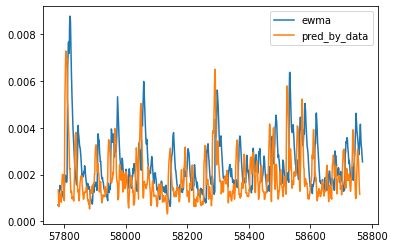

In [11]:
plt.plot(vol_pred_ewma[span_pred:], label='ewma')
plt.plot(vol_pred[span_pred:], label='pred_by_data')
plt.legend()
plt.show()

In [12]:
deviation_next_minute = (df['open'].shift(-1) - df['open']).abs()
deviation_next_minute

57771    0.002
57772    0.002
57773    0.001
57774    0.000
57775    0.000
         ...  
58766    0.001
58767    0.001
58768    0.001
58769    0.000
58770      NaN
Name: open, Length: 1000, dtype: float64

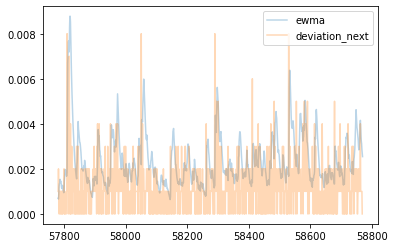

In [13]:
plt.plot(vol_pred_ewma[span_pred:], label='ewma', alpha=0.3)
plt.plot(deviation_next_minute[span_pred:], label='deviation_next', alpha=0.3)
plt.legend()
plt.show()

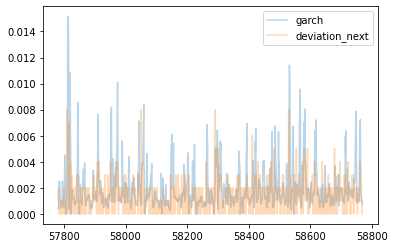

In [14]:
plt.plot(vol_pred_garch[span_pred:], label='garch', alpha=0.3)
plt.plot(deviation_next_minute[span_pred:], label='deviation_next', alpha=0.3)
plt.legend()
plt.show()

In [15]:
deviation_next_5minute = (df['open'].shift(-5) - df['open']).abs()
deviation_next_5minute

57771    0.001
57772    0.002
57773    0.001
57774    0.000
57775    0.000
         ...  
58766      NaN
58767      NaN
58768      NaN
58769      NaN
58770      NaN
Name: open, Length: 1000, dtype: float64

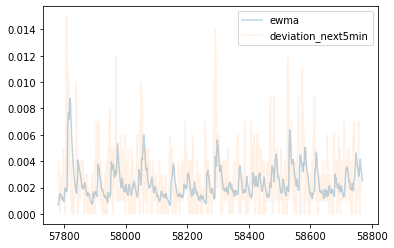

In [16]:
plt.plot(vol_pred_ewma[span_pred:], label='ewma', alpha=0.3)
plt.plot(deviation_next_5minute[span_pred:], label='deviation_next5min', alpha=0.1)
plt.legend()
plt.show()

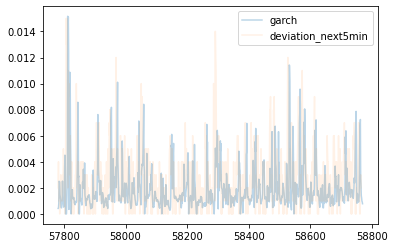

In [17]:
plt.plot(vol_pred_garch[span_pred:], label='garch', alpha=0.3)
plt.plot(deviation_next_5minute[span_pred:], label='deviation_next5min', alpha=0.1)
plt.legend()
plt.show()

garch跑的很慢。